# **Medical Insurance Cost Prediction with Feed Forward Neural Networks**
### **CU Boulder - Intro to Deep Learning - JRB**


# Introduction
**Problem Statement**

Health insurance costs are influenced by various factors, such as age, BMI, smoking habits, and geographical location. Predicting these costs accurately is critical for insurance companies to price policies fairly and for individuals to understand the factors impacting their premiums. This project focuses on developing a model to predict medical insurance costs using a dataset of demographic and health-related features.

**Why Use Deep Learning?**

While traditional machine learning methods like linear regression and random forests are effective for tabular data, deep learning offers unique advantages:

* **Non-linear Relationships:** Deep learning models can capture complex interactions between features that traditional linear methods might miss.
* **Feature Learning:** Neural networks automatically learn intricate feature combinations without requiring extensive feature engineering.
* **Scalability:** As datasets grow larger, deep learning models tend to perform better than traditional methods due to their ability to handle high-dimensional data.

This project also explores how deep learning generalizes to regression tasks compared to traditional machine learning models, providing insights into when and why to choose one method over the other.

# Approach
To evaluate the performance of deep learning and traditional machine learning models, we will:

1. Train a traditional regression model (Linear Regression and Random Forest).
2. Train a feedforward neural network using Keras.
3. Compare the models based on performance metrics using Mean Squared Error (MSE) and Mean Absolute Error (MAE).
4. Analyze the generalization capabilities of both methods.

# About the Dataset
The dataset used for this project is the Health Insurance Cost dataset from Kaggle (https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction). It consists of 2,272 samples and 7 features, including:

* **age:** Age of the beneficiary (numerical)
* **sex:** Gender of the individual (categorical: male/female)
* **bmi:** Body Mass Index, a measure of obesity (numerical)
* **children:** Number of dependents (numerical)
* **smoker:** Smoking status (categorical: yes/no)
* **region:** Residential area in the US (categorical: northeast, northwest, southeast, southwest)
* **charges:** The target variable representing medical insurance costs (numerical)

The dataset is balanced, clean, and well-suited for this study, making it an excellent choice for exploring prediction methods and comparing the performance of deep learning with traditional machine learning.

## **Step 1: Importing Libraries**

We start by importing all of the libraries we will need to load the data, run EDA (Exploratory Data Analysis), preprocess the data, train the different models and then evaluate their performance.

In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Set up the lab to upload data from Local Drive
from google.colab import files

In [4]:
# Upload and Load Data
uploaded = files.upload()  # Prompts to upload a file
df = pd.read_csv(next(iter(uploaded)))  # Load the uploaded file

Saving Medical_insurance.csv to Medical_insurance (1).csv


## **Step 2: Exploratory Data Analysis (EDA)**

In this step we will take a look at the data to understand it a bit better and to understand what kind of prerpocessing we will need to do in to the data before we start training our models.



In [5]:
# View the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We can see that the data is pretty straightforward, with our Charges column (our target) being numeric.

We also have a few variables that are categorical, like sex, smoker and region which we will need to convert into numerical to be able to use them in our models.

In [6]:
# Some basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


We can confirm the dataset if fairly clean, without any null values or missing data.

In [7]:
# Summary statistics
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Some summary statistics allow us to see some interesting information like minimum and maximum age (18 to 64) as well as median chidren at 1.

Let's take a better look at the distribution of our target variable, charges.

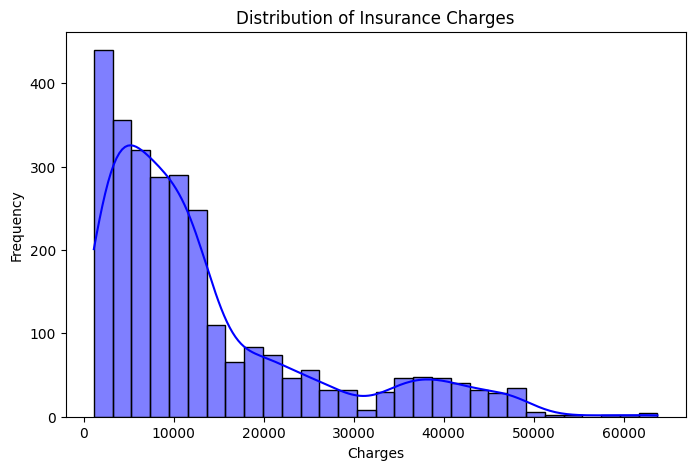

In [8]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

We can see we have a right skewed distribution, with very large charges on the right. This means that there are probably some variables that are more relevant than others, creating higher charges for part of the population and hence generating the skew that we see in the above distribution.

Lets look at our numerical variables using pairplots.

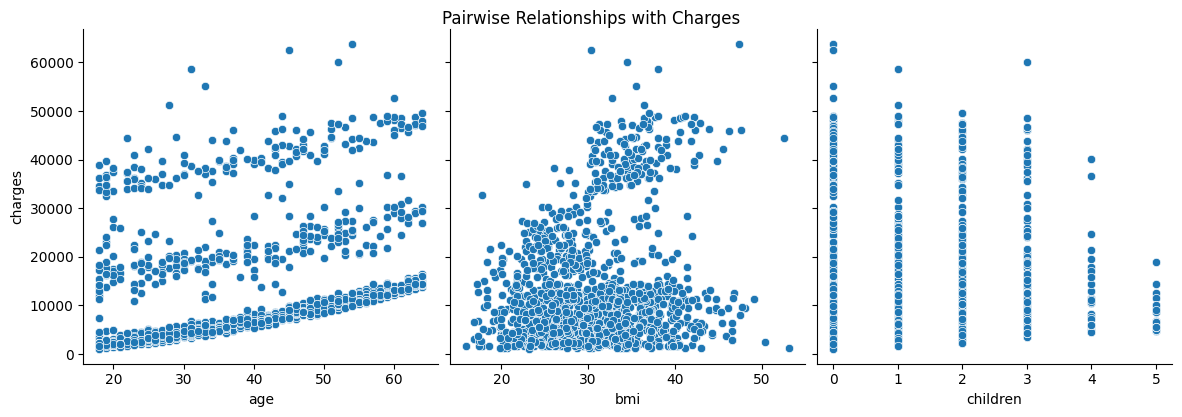

In [15]:
# Pairplot for numerical variables
sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.suptitle("Pairwise Relationships with Charges", y=1.02)
plt.show()

We can see that the age variable seems to have a positive correlation with charges, the interesting thing is that it is split into 3 different lines. We can hipothesize that other variables, such as sex or weather they are smokers or not, have an effect on rising costs while age raises them in a constant manner.

BMI shows a weaker correlation with charges, with some interesting outliers with high BMI and low charges. Nonetheless, as there is some correlation it can ge a good predictor for our target variable.

Children also looks interesting, in this case, there seems to be a weak negative correlation between number of children and age, where more children translates to lower charges.

Lets now take a look at our categorical variables using boxplots.

<ipython-input-16-4acaa4cd4749>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')


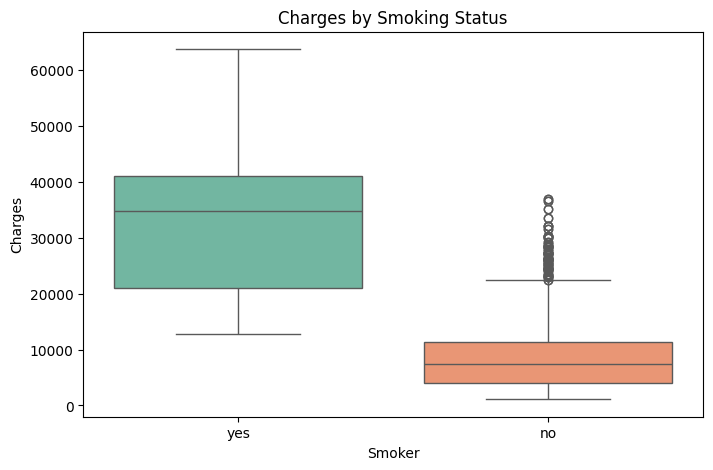

In [16]:
# Boxplot for charges by smoking status
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

As expected we see that, generally, smokers have much higher charges than non smokers. There are however a few outliers in the non smoker group which also point at a different variable for increasing charges. However, this factor seems to affect charges by quite a large amount hence it is a very good predictor variable.

Let's look at the region now.

<ipython-input-17-92bbcea95369>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='Set3')


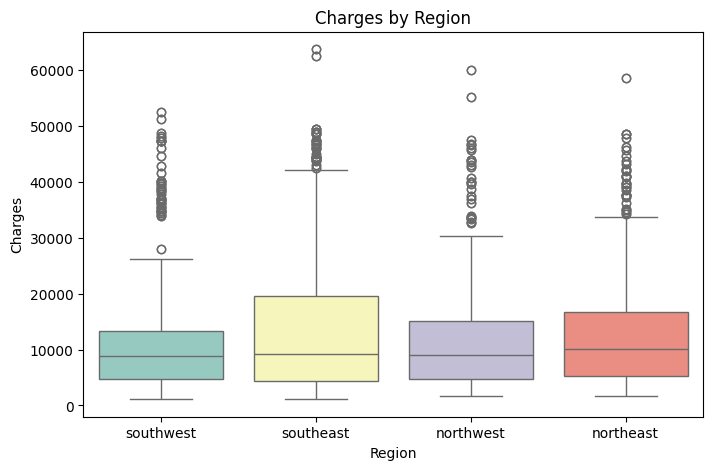

In [17]:
# Boxplot for charges by region
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='charges', data=df, palette='Set3')
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

There are some differences in regions and charges, but these are probably more related to common behaviors in those regions (smoking, BMI) than the actual region themselves. This is one of those variables that will be more interesting in a Deep Learning approach than on the more traditional models (where we might actually remove this variable completely).

Finally, lets look at sex and charges.

<ipython-input-18-209a30ff42ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette='Set1')


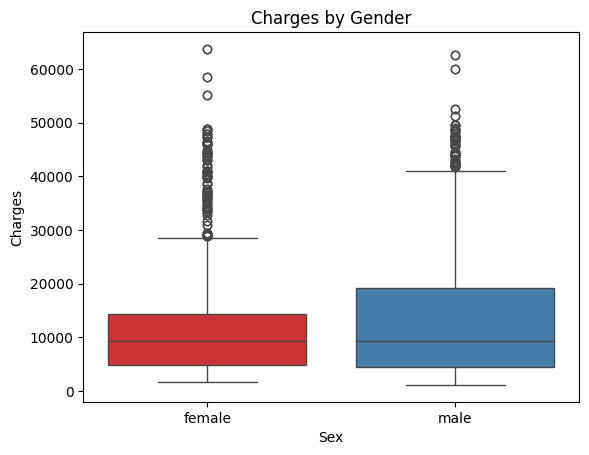

In [18]:
# Boxplot for charges by sex
sns.boxplot(x='sex', y='charges', data=df, palette='Set1')
plt.title('Charges by Gender')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

This variable is more complex, there is seems to be some more skewed distribution on the male side, however, there are quite a few ouliers on both sides. However, we do see that there is some predictive value to it, since males seem to be charged more than females.

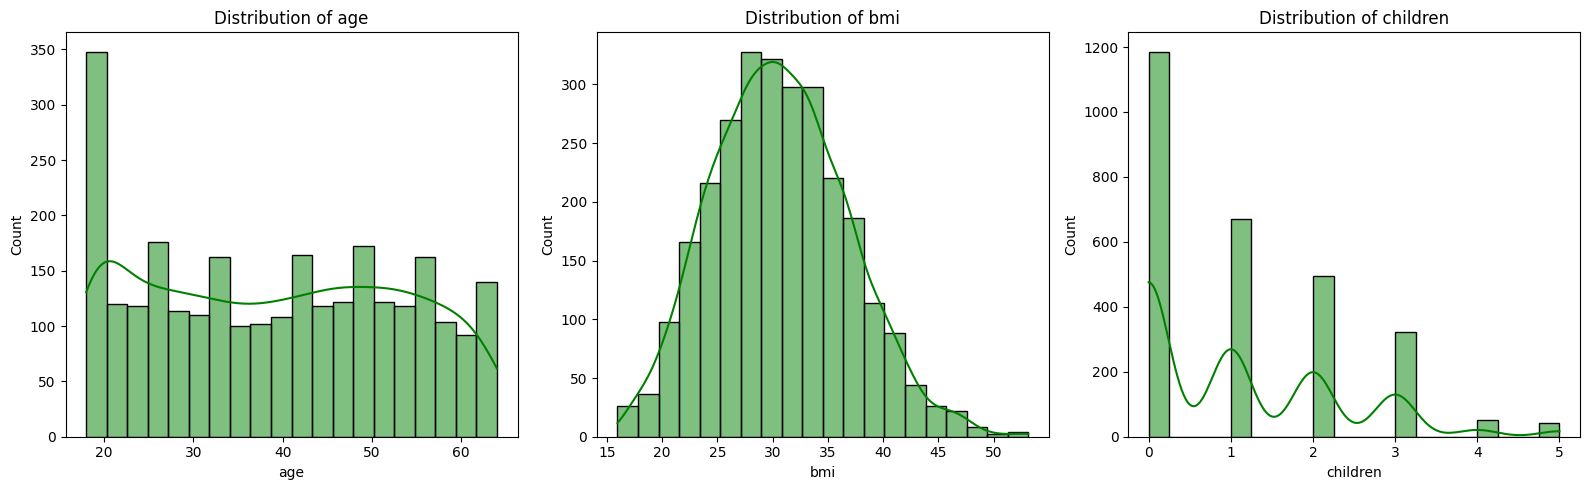

In [19]:
# Distributions of numerical features
numerical_cols = ['age', 'bmi', 'children']

plt.figure(figsize=(16, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='green')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Here we the distribution of the numerical features. Age is fairly evenly distributed. For BMI, we did expect the normal distribution we are getting, and as for children, we also expected to see a decreasing number or unites in the sample as the number of children increases.

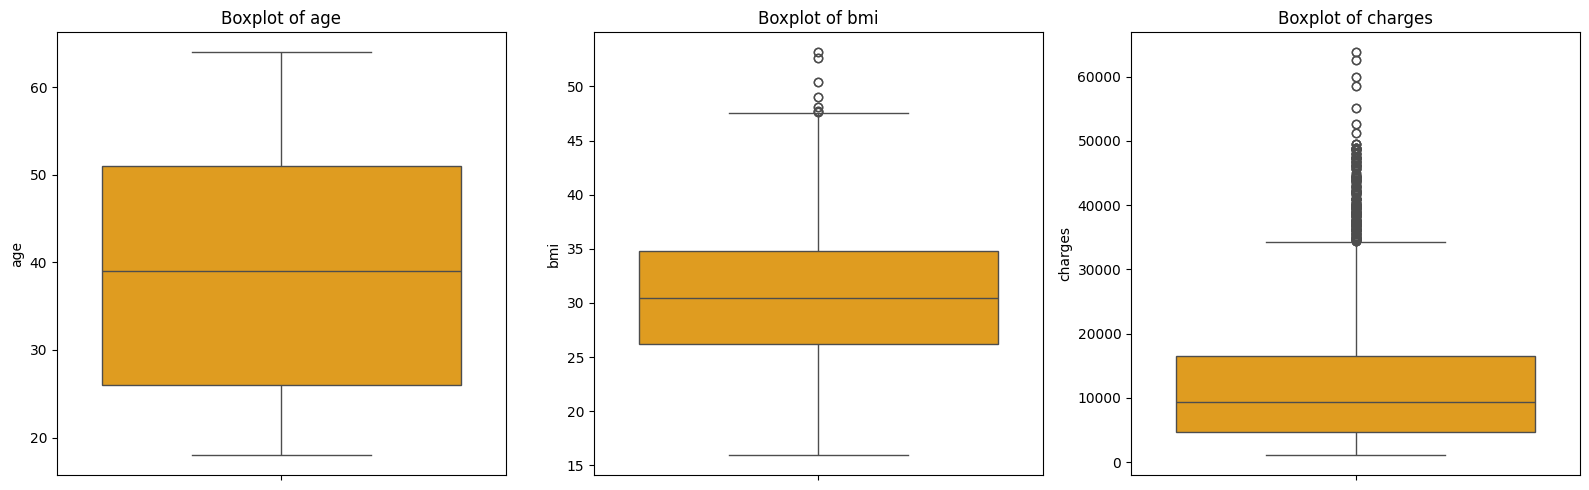

In [20]:
# Boxplots for numerical variables
plt.figure(figsize=(16, 5))
for i, col in enumerate(['age', 'bmi', 'charges'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Finally, doing some outlier detection we can see that age has no outliers, which is expected, BMI has very few outliers, but there are, as we saw earlier in the distribution, quite a lot of ourliers on our target variable 'charges'.

Nonetheless, this is the normal behavior of insurance, including those statistical outliers, so there is no need to remove them.

## **Step 3: Data Preprocessing**

To preprocess the data for all of our models, we will transform our variables using One Hot Encoding for our categorical variables and Standard Scaler for our numerical variables. This will allow us to create our training and testing sets for all of our models.

In [21]:
# Define categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

In [22]:
# Define transformers
categorical_transformer = OneHotEncoder(drop='first')  # Avoid multicollinearity
numerical_transformer = StandardScaler()

In [23]:
# Combine transformers in a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [24]:
# Apply transformations and split data
X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

Now that we have applied all of our transformation, we can now create our training and testing sets.

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

Finally we will fit our transformed data.

In [31]:
# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Preprocessing complete. Transformed feature shape:", X_train.shape)

Preprocessing complete. Transformed feature shape: (2217, 8)


## **Step 4: Linear Regression Model**

We will start with a basic Linear regression model. This will serve as a benchmark for evaluating the performance of more complex models like deep learning.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Initialize the model
linear_model = LinearRegression()

# Step 2: Fit the model to the training data
linear_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Step 4: Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Linear Regression Performance:")
print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}")

Linear Regression Performance:
Training MSE: 36787517.08, Testing MSE: 36782736.31
Training MAE: 4131.50, Testing MAE: 4289.93


The results of our Linear Regression model show that the model works fairly well at generalization (training and testing MSE and MAE are similar). However, it does not seem to be a very accurate model because of the large values in bothe MSE and MAE, meaning that on the absolute level, the model is missing the prediction of the charge by about 4300.

## **Step 5: Desicion Tree Model**

Second, we will train and evaluate a Desicion Tree model. This will allow us to compare against the performance of the Linear Regression Model and then to the Deep Learning Model.

In [34]:
from sklearn.tree import DecisionTreeRegressor

# Step 1: Initialize the model
decision_tree_model = DecisionTreeRegressor(random_state=52)

# Step 2: Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_train_tree = decision_tree_model.predict(X_train)
y_pred_test_tree = decision_tree_model.predict(X_test)

# Step 4: Evaluate the model
mse_train_tree = mean_squared_error(y_train, y_pred_train_tree)
mse_test_tree = mean_squared_error(y_test, y_pred_test_tree)

mae_train_tree = mean_absolute_error(y_train, y_pred_train_tree)
mae_test_tree = mean_absolute_error(y_test, y_pred_test_tree)

print("Decision Tree Regression Performance:")
print(f"Training MSE: {mse_train_tree:.2f}, Testing MSE: {mse_test_tree:.2f}")
print(f"Training MAE: {mae_train_tree:.2f}, Testing MAE: {mae_test_tree:.2f}")

Decision Tree Regression Performance:
Training MSE: 235756.72, Testing MSE: 11133363.29
Training MAE: 28.55, Testing MAE: 708.06


As we can see, the Decision Tree model performs quite a bit better than the Linear Regression. However, it does seem to be overfitting as we can see a huge difference in MSE and MAE form the training and testing sets.

Nonetheless, this will be another good model to compare aginst our Deep Learning Model.

## **Step 6: Deep Learning Model: Feedforward Neural Network**

Model Architecture:

A feedforward neural network typically consists of an input layer, one or more hidden layers, and an output layer.
Input Layer: Should match the number of features in your dataset (X_train.shape[1]).
Hidden Layers: Choose a number of hidden layers and neurons per layer. Start with a few layers (e.g., one or two) and adjust based on performance.
Activation Functions: Use ReLU for hidden layers and a linear activation for the output layer, as it's a regression problem.
Dropout: To prevent overfitting, use dropout layers after each hidden layer to randomly drop a fraction of the neurons during training.

Compilation:

Choose an optimizer (e.g., adam) and a loss function (e.g., mean_squared_error) suitable for regression tasks.
Set the metrics to track additional performance metrics like mean_absolute_error.

Training:

Train the model on the training data, using a suitable batch size and number of epochs. Use early stopping to avoid overfitting by monitoring a validation metric.

Evaluation:

Evaluate the model using metrics like MSE and MAE on both the training and testing sets to understand how well the model generalizes.

In [35]:
# Deep Learning Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
# Step 1: Initialize the model
model = Sequential()

In [64]:
# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

In [66]:
# Output layer
model.add(Dense(1, activation='linear'))

In [67]:
# Step 2: Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [68]:
# Step 3: Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.3, verbose=1, callbacks=[early_stopping])

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 331083136.0000 - mean_absolute_error: 13186.6436 - val_loss: 279743168.0000 - val_mean_absolute_error: 11971.8564
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 231530080.0000 - mean_absolute_error: 10107.8604 - val_loss: 96503912.0000 - val_mean_absolute_error: 7835.2598
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 89170792.0000 - mean_absolute_error: 7378.0815 - val_loss: 77974320.0000 - val_mean_absolute_error: 6874.6914
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79529536.0000 - mean_absolute_error: 6930.7744 - val_loss: 61370736.0000 - val_mean_absolute_error: 5937.8750
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 58459704.0000 - mean_absolute_error: 5748.0850 - val_loss: 47678332.0000 - val_mean_absolute_error: 5303.4189
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51407032.0000 - mean_absolute_error: 5343.9102 - val_loss: 39251388.0000 - val_mean_absolu

In [69]:
# Step 4: Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print("Deep Learning Model Performance:")
print(f"Training MSE: {train_loss:.2f}, Testing MSE: {test_loss:.2f}")
print(f"Training MAE: {train_mae:.2f}, Testing MAE: {test_mae:.2f}")

Deep Learning Model Performance:
Training MSE: 20891014.00, Testing MSE: 22092010.00
Training MAE: 2482.16, Testing MAE: 2652.52


In this case, we see a relatively good balance between the training and the testing set. It performed better than the Linear Regression Model and it did not fall to overfitting like the Decision Tree Model.

## **Step 7: Conclusions and Future Work**

These are the tabulated results of all of our models:

| Model                    |     Training MSE |   Testing MSE |   Training MAE |   Testing MAE |
|:-------------------------|-----------------:|--------------:|---------------:|--------------:|
| Linear Regression        |      3.67875e+07 |   3.67827e+07 |        4131.5  |       4289.93 |
| Decision Tree Regression | 235757           |   1.11334e+07 |          28.55 |        708.06 |
| Deep Learning Model      |      2.0891e+07  |   2.2092e+07  |        2482.16 |       2652.52 |

Linear regression performed quite consistently, with almost no overfitting (as the training and testing MSE are nearly identical). However, its performance in terms of MAE suggests there’s substantial error in its predictions, making it less ideal for this dataset.

The decision tree model performed exceptionally well on the training data with a very low MSE and MAE, but it struggled to generalize to the testing data (with a significantly higher testing MSE and MAE). This is a classic case of overfitting, where the model learned the training data too well but failed to generalize.

The deep learning model shows a relatively good balance between training and testing performance. Although its testing MSE and MAE are higher than the decision tree’s, it is still competitive. The model seems to generalize better than the decision tree, with slightly higher error than linear regression but lower than the decision tree.


### **Key Insights:**

**Linear Regression’s Simplicity:**

Linear regression, while simple, did a reasonable job on this dataset. Its performance is fairly consistent but doesn’t fully exploit the potential complexity in the data. It’s a good baseline model, but doesn’t offer the same flexibility as decision trees or deep learning.

**Overfitting in Decision Trees:**

The decision tree is a highly flexible model that can easily overfit, especially when no regularization or pruning is applied. It fit the training data too well, but failed to generalize to the testing data. This indicates that further tuning (e.g., controlling tree depth or pruning) could improve its performance.

**Deep Learning's Balance:**

The deep learning model is likely the most promising in terms of capturing complex relationships in the data, but its slightly higher MAE compared to decision trees suggests that the model might still benefit from additional tuning, such as optimizing the network architecture or adding more features. It's also possible that more training epochs could further improve the model.


The Deep Learning model shows the most promise due to its better generalization performance compared to the Decision Tree, which suffered from overfitting. However, improvements in both models are necessary.

The Linear Regression model, while providing a good baseline, can be outperformed by more complex models such as Decision Trees and Deep Learning, especially when the data contains non-linear relationships.

For future work, a combination of feature engineering, hyperparameter tuning, and ensemble methods will likely lead to improved results. Additionally, experimenting with different deep learning architectures and regularization techniques should help reduce the higher error rates observed.